#DATA PROFILING AND ANALYSIS

##BASIC INFORMATION

In [23]:
#importing all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Reading the csv file and taking out basic informationn

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pokemon/Pokemon.csv")

print("\n\n\nFirst 5 rows of the dataset\n\n",df.head())
print("\n\nNumber of rows and columns:",(df.shape),"\n\n")
print(df.info(),"\n\n")

#Setting # as a unique identifier which is just serial number because we dont need its stats
#inplace le chai hamro change lai implement garauxa
df.set_index("#", inplace=True)
print("\nSTATS\n\n",df.describe())




First 5 rows of the dataset

    #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


Number of rows and columns: (800, 13) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      -----

This cell reads the .csv file and gives its basic info by using functions like head(),info(),shape,describe()

##Unique Values

In [22]:
#checking for unique values

print("Unique Values:\n",df.nunique())
print("\nTotal Unique Values:",df.nunique().sum())
print("\nValues in Legendary Column:\n",df["Type 1"].value_counts())

Unique Values:
 Name         800
Type 1        18
Type 2        18
Total        200
HP            94
Attack       111
Defense      103
Sp. Atk      105
Sp. Def       92
Speed        108
Legendary      2
dtype: int64

Total Unique Values: 1651

Values in Legendary Column:
 Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


This cell checks for unique value and gives all the column with there unique values using nunique(), value_counts() function

##Null Values

In [18]:
#Checking for null values
print("List of null values:\n",df.isnull().sum())
print("\nTotal null values:",df.isnull().sum().sum())

#Replaces the None with Null value
# df["Type 2"] = df["Type 2"].replace("No Secondary Type", np.nan)


List of null values:
 Name           0
Type 1         0
Type 2       386
Total          0
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
dtype: int64

Total null values: 386


This cell counts the null values and shows all columns with null values


In [20]:
#filling the null values with none in Type 2 of pokemon

df["Type 2"]=df["Type 2"].fillna("No Secondary Type")
print("Total Null Values:",df.isnull().sum().sum())
print("\n",df["Type 2"].value_counts())

Total Null Values: 386

 Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Rock        14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64


In this cell we fill the null value with "No secondary Type" as those pokemons only have one type

##Changing data type

In [26]:
#Changing datatype of Type 1, Type 2 and generation to categorical
print("Before:\n\n",df.dtypes)
df["Type 1"]=df["Type 1"].astype("category")
df["Type 2"]=df["Type 2"].astype("category")
df["Generation"]=df["Generation"].astype("category")
df["Name"]=df["Name"].astype("string")
print("\n\nAfter\n\n",df.dtypes)

Before:

 Name          string[python]
Type 1              category
Type 2                object
Total                  int64
HP                     int64
Attack                 int64
Defense                int64
Sp. Atk                int64
Sp. Def                int64
Speed                  int64
Generation          category
Legendary               bool
dtype: object


After

 Name          string[python]
Type 1              category
Type 2              category
Total                  int64
HP                     int64
Attack                 int64
Defense                int64
Sp. Atk                int64
Sp. Def                int64
Speed                  int64
Generation          category
Legendary               bool
dtype: object


In this cell we change data type of generation,Type 1 and Type 2 to categorical and Name to string



##Duplicate Values

In [ ]:
#Checking duplicate values

print("Number of duplicate rows:",df.duplicated().sum())


Number of duplicate rows: 0


Checking the number of duplicate values

#Feature Engineering

In [ ]:
#creating a new feature Power

df["Power"]=df["Speed"]+df["Attack"]+df["Defense"]
print(df.head(1))
print("\n\nStats of Power:\n\n",df["Power"].describe())

        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                           
1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  Power  
#                                       
1     45           1      False    143  


Stats of Power:

 count    800.000000
mean     221.121250
std       67.120865
min       40.000000
25%      170.000000
50%      219.500000
75%      270.000000
max      430.000000
Name: Power, dtype: float64


Creating a new feature power from attack, speed and defense

#VISUALIZATION

##Histogram

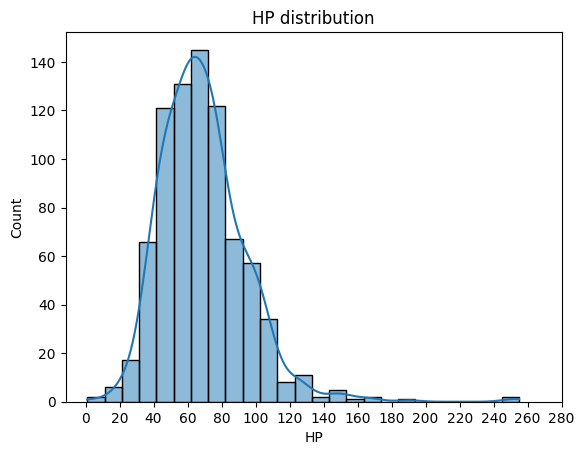

In [ ]:
sns.histplot(df["HP"],kde=True,binwidth=10)
plt.title("HP distribution")
plt.xticks(range(0,300, 20))
plt.show()

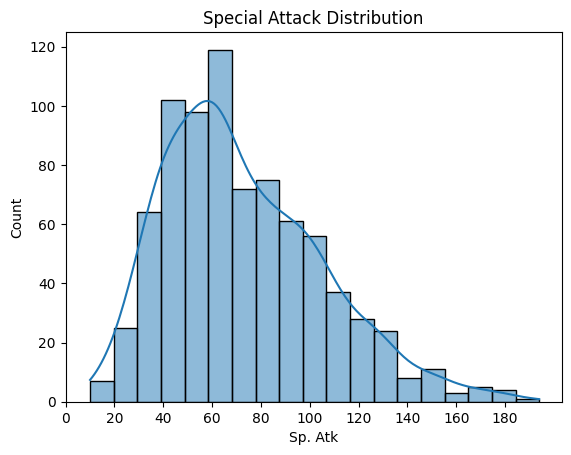

In [ ]:
sns.histplot(df["Sp. Atk"],kde=True)
plt.xticks(range(0,200,20))
plt.title("Special Attack Distribution")
plt.show()

##Line plot

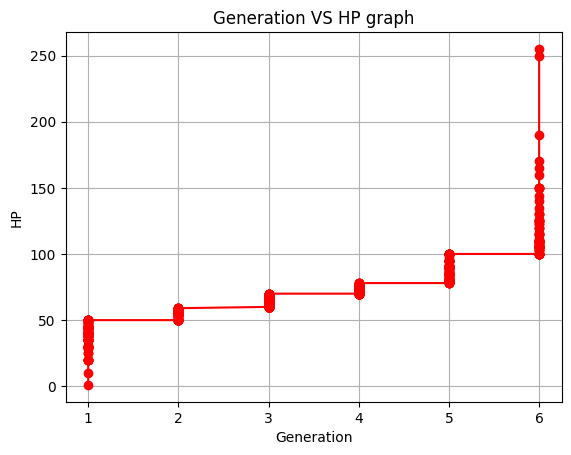

In [ ]:
plt.plot(df["Generation"],df["HP"].sort_values(),marker="o",color="red")
plt.xlabel("Generation")
plt.ylabel("HP")
plt.title("Generation VS HP graph")
plt.grid(True)
plt.show()

##HeatMap

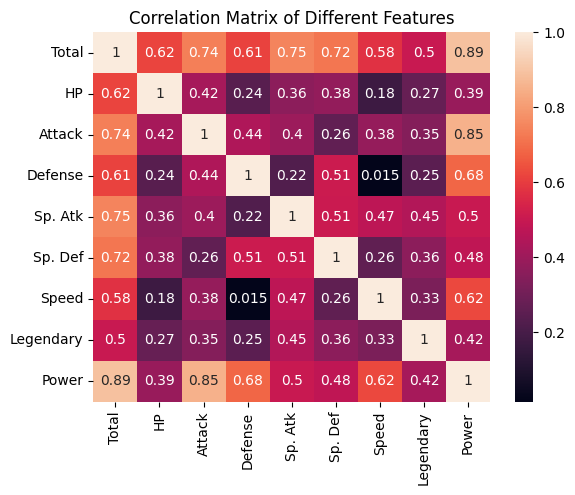

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix of Different Features")
plt.show()

##KDE PLOT

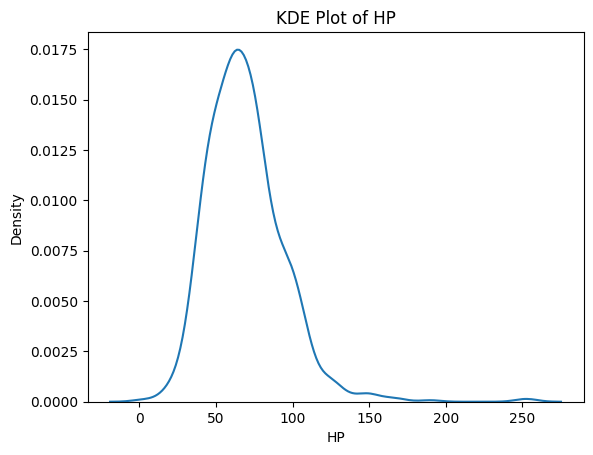

In [ ]:
sns.kdeplot(df["HP"])
plt.title("KDE Plot of HP")
plt.xlabel("HP")
plt.ylabel("Density")
plt.show()

##BoxPlot

Before Handling Outlier



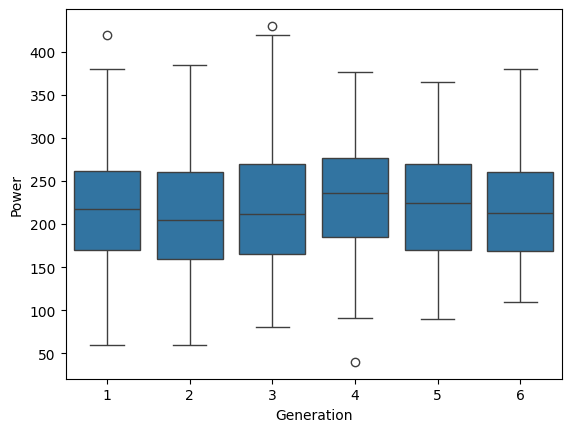

In [ ]:
#Before handling Outlier

print("Before Handling Outlier\n")
sns.boxplot(x="Generation",y="Power",data=df)
plt.savefig("a.png")
plt.show()



After Handling Outlier




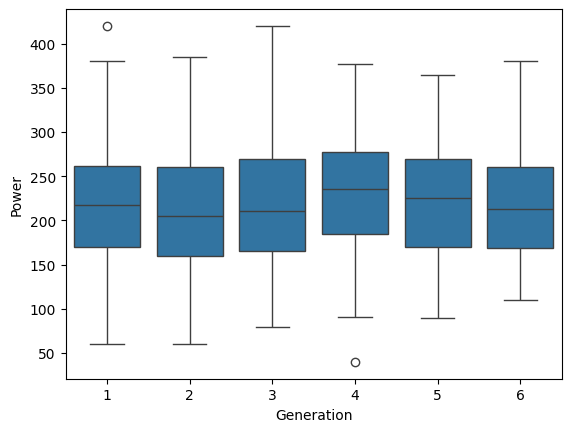

In [ ]:
q1=df["Power"].quantile(0.25)
q3=df["Power"].quantile(0.75)
iqr=q3-q1

lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

new_df = df[(df["Power"] > lower) & (df["Power"] <= upper)]

print("\n\nAfter Handling Outlier\n\n")
sns.boxplot(x="Generation",y="Power",data=new_df)
plt.show()

##BarPlot

<ipython-input-32-c833b9641674>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


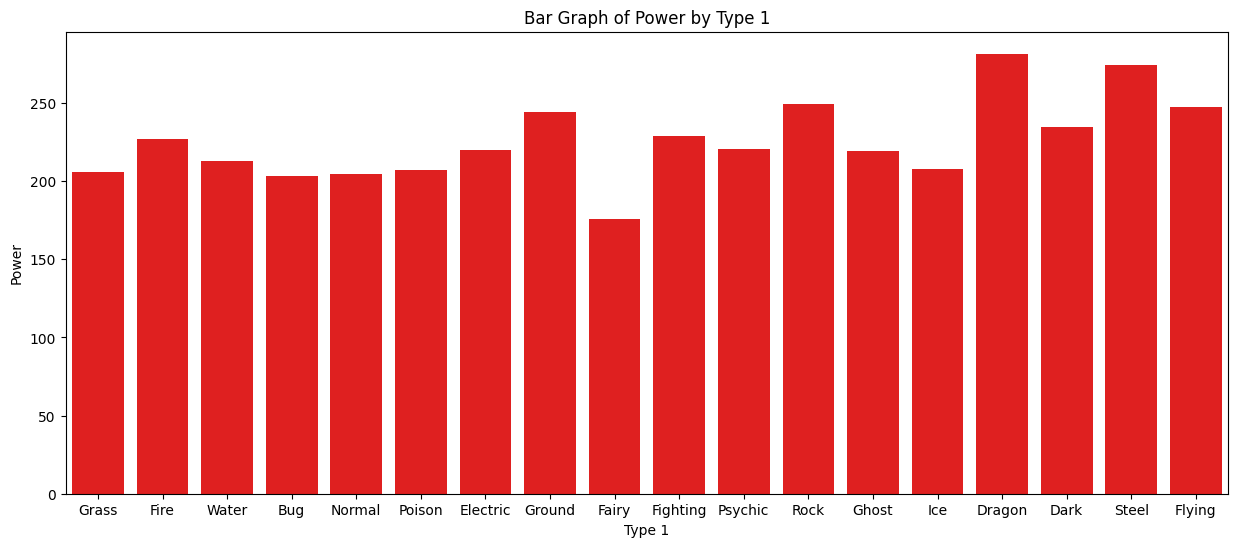

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(
    x="Type 1",
    y="Power",
    data=df,
    color="red",
    ci=None
)
plt.title("Bar Graph of Power by Type 1")
plt.show()

<ipython-input-34-8b0a98e22bb7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


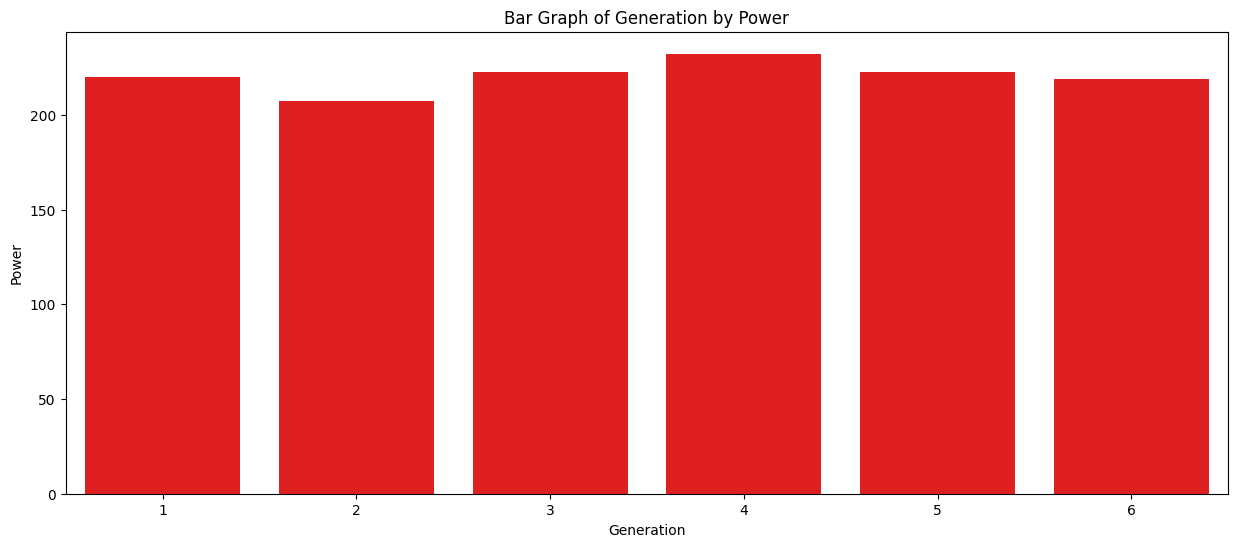

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(
    x="Generation",
    y="Power",
    data=df,
    color="red",
    ci=None,
)
plt.title("Bar Graph of Generation by Power")
plt.show()

#FINDINGS

From this Dataset we can get the information about all Pokemons which are in the Pokemon Series. Pokemon is a Japanese Anime which is very popular among kids and youths. In this show there are different types of Pokemon similar to how there are different type of animals in our world. Different Pokemons have different abilities and types. From this dataset we can get detailed information about such pokemons. Some of the major findings and insights from the given dataset are as follows:

1. There are total 800 pokemon and all of them are of a certain type, some have two types(water and grass) and some have only 1.

2. There is a type which seperates the pokemon and that is legendary type, among 800, only 65 of them are legendary type. Type 1 and Type 2 are normal whereas legendary type refers to as royal family in our world.

3. Defense and Special Defense, Special Defense and Special Attack are positively correlated to each other ie there correlation is 0.5.

4. Generation and Speed are weakly but negatively correlated to each other i.e their correlation is -0.023.

5. Dragon type pokemon has the highest power whereas fairy type pokemon has the lowest power.

